In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max.columns', None)
from sklearn.cross_validation import train_test_split, cross_val_score, KFold
from sklearn import metrics
from sklearn.metrics import roc_curve, f1_score, accuracy_score, precision_recall_curve, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

%matplotlib inline

D:\WorkArea\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('Pokemon.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
print(str(len(df[df['Legendary'] == True]) / len(df) * 100) + '%')

8.125%


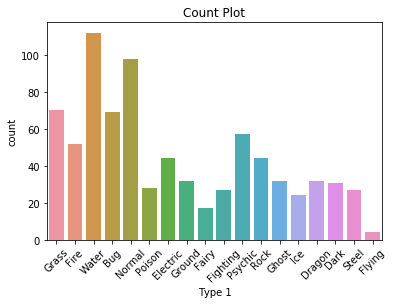

In [6]:
plt.title('Count Plot')
plt.xticks(rotation = 45)
sns.countplot(df['Type 1'])

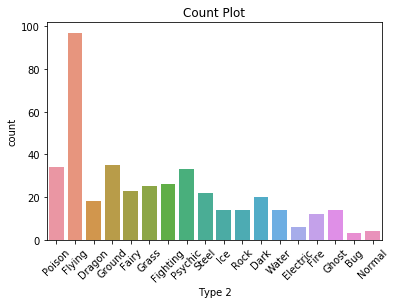

In [7]:
plt.title('Count Plot')
plt.xticks(rotation = 45)
sns.countplot(df['Type 2'])

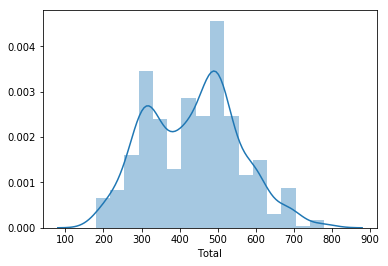

In [8]:
sns.distplot(df['Total'])

In [9]:
df['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

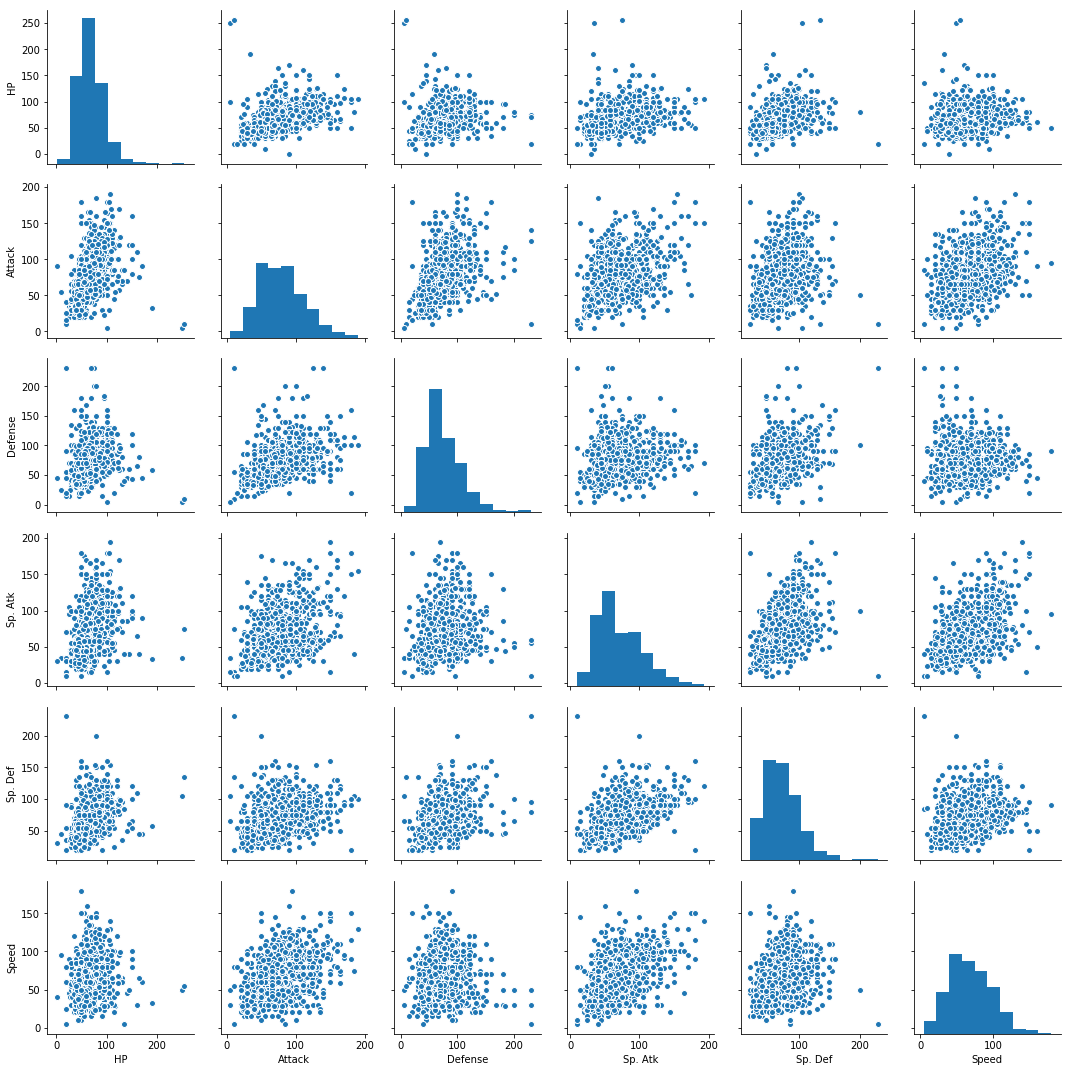

In [10]:
sns.pairplot(df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']])

In [11]:
corr = df.corr()

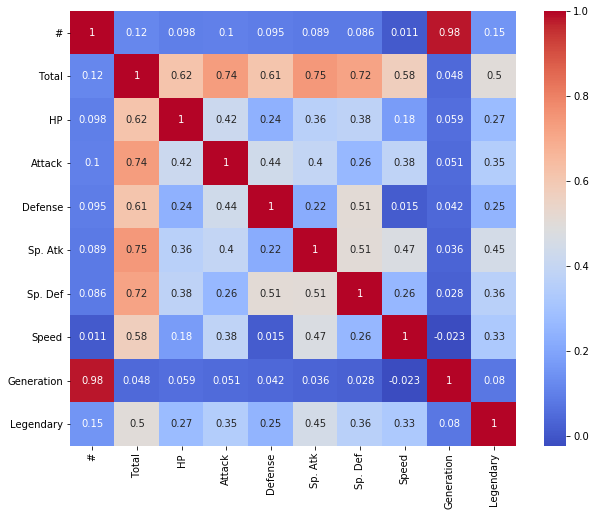

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [13]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [14]:
df[df['Name'].duplicated()] # no dupliactes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


In [15]:
pd.crosstab(df['Type 1'] , df['Legendary'])

Legendary,False,True
Type 1,,
Bug,69,0
Dark,29,2
Dragon,20,12
Electric,40,4
Fairy,16,1
Fighting,27,0
Fire,47,5
Flying,2,2
Ghost,30,2


In [16]:
for i in df.columns:
    print(i, len(df[i].unique()))

# 721
Name 800
Type 1 18
Type 2 19
Total 200
HP 94
Attack 111
Defense 103
Sp. Atk 105
Sp. Def 92
Speed 108
Generation 6
Legendary 2


In [17]:
df['Legendary'] = df['Legendary'].apply(lambda x: 1 if x == True else 0)

In [18]:
dataset = df.iloc[:, 2:]

In [19]:
dataset.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Fire,NaN,309,39,52,43,60,50,65,1,0


In [20]:
dataset = pd.get_dummies(dataset, dummy_na=True,drop_first=True)
dataset['Target'] = dataset['Legendary']
dataset.drop(['Legendary', 'Total'], inplace=True, axis=1)

In [21]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [22]:
y.head(2)

0    0
1    0
Name: Target, dtype: int64

In [23]:
X.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Type 1_nan,Type 2_Dark,Type 2_Dragon,Type 2_Electric,Type 2_Fairy,Type 2_Fighting,Type 2_Fire,Type 2_Flying,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Type 2_nan
0,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,39,52,43,60,50,65,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [24]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
X_train.shape

(640, 43)

In [26]:
X_test.shape

(160, 43)

In [27]:
y_train.shape

(640,)

In [28]:
y_test.shape

(160,)

In [29]:
clr = LogisticRegression()

In [30]:
clr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
y_pred = clr.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred)

0.9375

In [33]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97       146
          1       1.00      0.29      0.44        14

avg / total       0.94      0.94      0.92       160



In [34]:
cm = confusion_matrix(y_test, y_pred)

In [35]:
cm

array([[146,   0],
       [ 10,   4]], dtype=int64)

In [36]:
probs = clr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

In [37]:
## SVC

In [38]:
svc = SVC(probability=True)

In [39]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
svc_probs = svc.predict_proba(X_test)
svc_preds = svc_probs[:,1]
svc_fpr, svc_tpr, svc_threshold = metrics.roc_curve(y_test, svc_preds)
svc_roc_auc = metrics.auc(svc_fpr, svc_tpr)

In [50]:
svc_y_pred = svc.predict(X_test)

In [51]:
accuracy_score(y_test, svc_y_pred)

0.91249999999999998

In [52]:
tpr

array([ 0.07142857,  0.64285714,  0.64285714,  0.71428571,  0.71428571,
        0.78571429,  0.78571429,  0.85714286,  0.85714286,  0.92857143,
        0.92857143,  1.        ,  1.        ])

In [53]:
svc_tpr

array([ 0.        ,  0.        ,  0.14285714,  0.14285714,  0.21428571,
        0.21428571,  0.28571429,  0.28571429,  0.5       ,  0.5       ,
        0.78571429,  0.78571429,  0.78571429,  0.85714286,  0.85714286,
        0.92857143,  0.92857143,  1.        ,  1.        ])

In [54]:
cm

array([[146,   0],
       [ 10,   4]], dtype=int64)

In [55]:
svc_cm = confusion_matrix(y_test, svc_y_pred)

In [56]:
svc_cm

array([[146,   0],
       [ 14,   0]], dtype=int64)

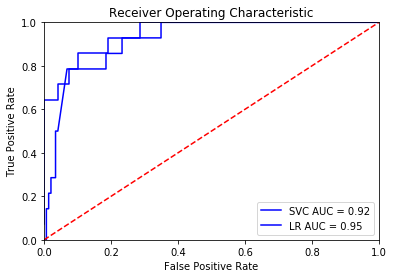

In [57]:
plt.title('Receiver Operating Characteristic')
plt.plot(svc_fpr, svc_tpr, 'b', label = 'SVC AUC = %0.2f' % svc_roc_auc)
plt.plot(fpr, tpr, 'b', label = 'LR AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')